In [14]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [15]:
import numpy as np
import pandas as pd
import datetime as dt  

In [38]:
##Reflect Tables into SQLAlchemy ORM
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [39]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")  

In [40]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [41]:
  # View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [42]:
  # Save references to each table
Station=Base.classes.station
Measurement=Base.classes.measurement

In [43]:
  # Create our session (link) from Python to the DB
session=Session(engine)

In [44]:
inspector=inspect(engine)

In [45]:
columns=inspector.get_columns('Station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [46]:
columns=inspector.get_columns('Measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [47]:
##Exploratory Precipitation Analysis
 # Find the most recent date in the data set.
most_recent_date= (session.query(Measurement.date)
                  .order_by(Measurement.date.desc())
                  .first())
most_recent_date

('2017-08-23',)

In [48]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

In [49]:
# Calculate the date one year from the last date in data set.
one_year=dt.date(2017, 8, 23) - dt.timedelta(days=365)

one_year

datetime.date(2016, 8, 23)

In [50]:
# Perform a query to retrieve the data and precipitation scores

annual_prcp=(session.query(Measurement.date,func.max(Measurement.prcp))
            .filter(func.strftime('%Y-%m-%d', Measurement.date) > one_year)
            .group_by(Measurement.date)
            .all())
annual_prcp

[('2016-08-24', 2.28),
 ('2016-08-25', 0.21),
 ('2016-08-26', 0.04),
 ('2016-08-27', 0.18),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.02),
 ('2016-09-02', 0.19),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.74),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.22),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.36),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.94),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.08),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.46),
 ('2016-10-05', 0.81),
 ('2016-10-06', 0.

In [54]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df=pd.DataFrame(annual_prcp, columns=['date', 'prcp'])
prcp_df.set_index('date', inplace=True)
prcp_df

,prcp
date,
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
2016-08-28,2.07
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.56


In [55]:
# Sort the dataframe by date
prcp_df.sort_values('date')

,prcp
date,
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
2016-08-28,2.07
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.56


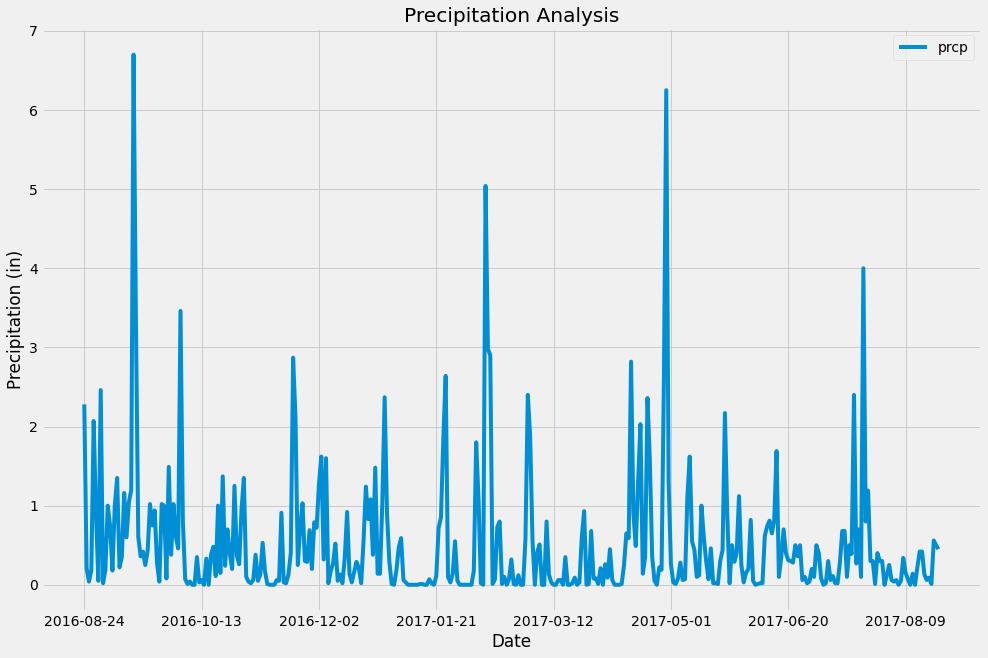

In [60]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot(title="Precipitation Analysis", figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Precipitation (in)')
plt.show()

In [57]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [61]:
  prcp_df.describe()

,prcp
count,365.000000
mean,0.517288
std,0.829196
min,0.000000
25%,0.040000
50%,0.250000
75%,0.650000
max,6.700000


In [63]:
##Exploratory Station Analysis
 # Design a query to calculate the total number stations in the dataset
station_count=session.query(Measurement.station).distinct().count()

station_count

9

In [64]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

most_active= session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by (func.count(Measurement.station) .desc()).all()

most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [67]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

sel = [func.min(Measurement.tobs),
      func.max(Measurement.tobs),
      func.avg(Measurement.tobs)]

temp_analysis = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').all()
temp_analysis

[(54.0, 85.0, 71.66378066378067)]

In [75]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_data = session.query(Measurement.tobs).\
    filter(Measurement.date >= one_year).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date).all()


temp_data_df = pd.DataFrame(temp_data, columns=['tobs'])
temp_data_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


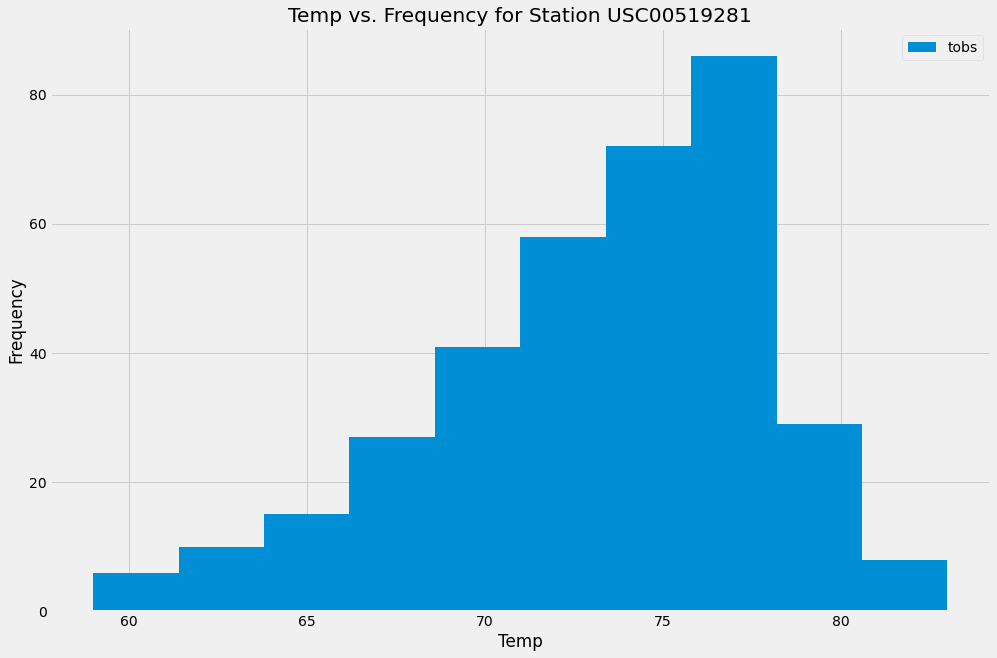

In [79]:
temp_data_df.plot.hist(title = 'Temp vs. Frequency for Station USC00519281', figsize=(15,10))
plt.xlabel('Temp')
plt.ylabel('Frequency')
plt.show()

In [80]:
##Close session
 # Close Session
session.close()  